In [480]:
import numpy as np
import matplotlib.pyplot as plt

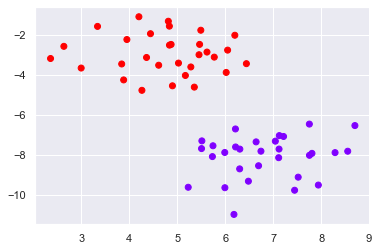

In [481]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=60, centers=2, random_state=44, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow');

In [482]:
# Support vector classifier
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E8)
model.fit(X, y)

SVC(C=100000000.0, kernel='linear')

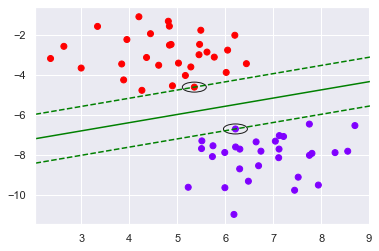

In [483]:
def plot_SVC(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='green', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        for vector in model.support_vectors_:
            circle = plt.Circle(vector, 0.25, color='k', fill=False)
            ax.add_patch(circle)
            
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plot_SVC(model);

In [484]:
print("The support vectors are: \n",model.support_vectors_)

The support vectors are: 
 [[ 6.21386196 -6.70231583]
 [ 5.35601719 -4.60907726]]
